In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from xgboost import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/churn project/Churn_Modelling.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

In [7]:
df.rename(columns= {'Geography': 'Country'},inplace= True)

In [8]:
df.drop(columns= ['RowNumber','CustomerId','Surname'],inplace= True)

In [9]:
df1 = df.drop(columns= 'Gender')

In [10]:
df1 = pd.get_dummies(df1 ,drop_first= False)


In [11]:
df = pd.get_dummies(df ,drop_first= False)
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [12]:
X = df1.copy()
X.drop(columns= "Exited",inplace= True)
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
y = df1['Exited']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, stratify= y)

In [15]:
xgb = XGBClassifier(objective= 'binary:logistic', random_state = 0)
cv_params = {'max_depth': [3,4,5,6,10],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [25,50,100,200],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }
scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=10, refit='f1',verbose= 4)

In [16]:
xgb_cv.fit(X_train,y_train, verbose = True)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25, subsample=0.7; accuracy: (test=0.847) f1: (test=0.465) precision: (test=0.806) recall: (test=0.327) total time=   0.0s
[CV 2/10] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25, subsample=0.7; accuracy: (test=0.852) f1: (test=0.488) precision: (test=0.828) recall: (test=0.346) total time=   0.0s
[CV 3/10] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25, subsample=0.7; accuracy: (test=0.841) f1: (test=0.408) precision: (test=0.854) recall: (test=0.268) total time=   0.0s
[CV 4/10] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25, subsample=0.7; accuracy: (test=0.857) f1: (test=0.511) precision: (test=0.848) recall: (test=0.366) total time=   0.0s
[CV 5/10] END colsample_bytree=0.7, lea

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 10],
                         'min_child_weight': [3, 5],
                         'n_estimators': [25, 50, 100, 200],
                         'subsample': [0.7]},
             refit='f1', scoring={'precision', 'accuracy', 'recall', 'f1'},
             verbose=4)

In [17]:
final_clf = xgb_cv.best_estimator_
final_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [18]:
final_clf.score(X_test,y_test)


0.8668

In [19]:
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))
xgb_cv = pickle.load(open('xgb_cv.sav', 'rb'))

([<matplotlib.axis.YTick at 0x29225791060>,
 [Text(0, 0, 'Tenure'),
  Text(0, 1, 'HasCrCard'),
  Text(0, 2, 'EstimatedSalary'),
  Text(0, 3, 'CreditScore'),
  Text(0, 4, 'Country_France'),
  Text(0, 5, 'Country_Spain'),
  Text(0, 6, 'Balance'),
  Text(0, 7, 'Country_Germany'),
  Text(0, 8, 'IsActiveMember'),
  Text(0, 9, 'Age'),
  Text(0, 10, 'NumOfProducts')])

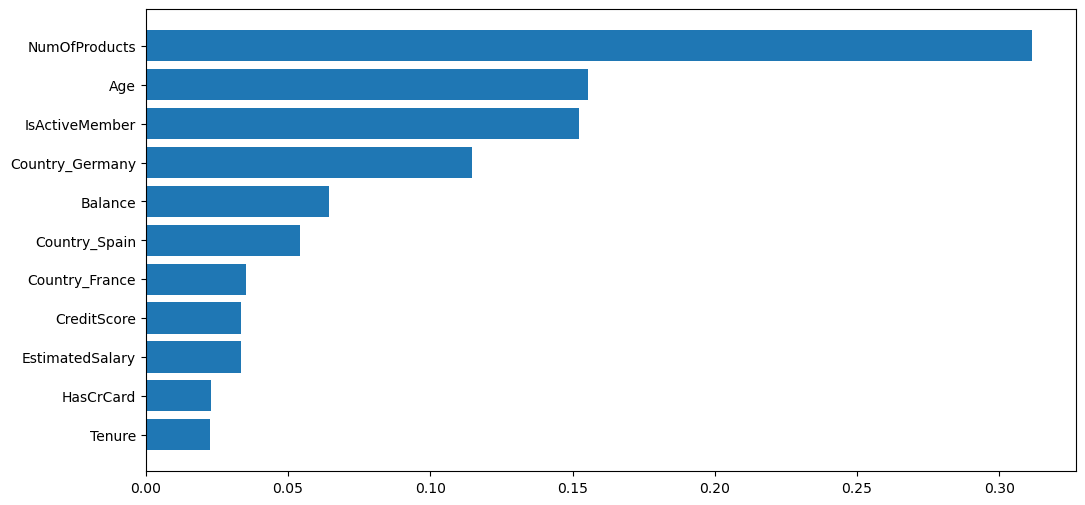

In [32]:
feature_importance = final_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize = (12,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align = 'center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])


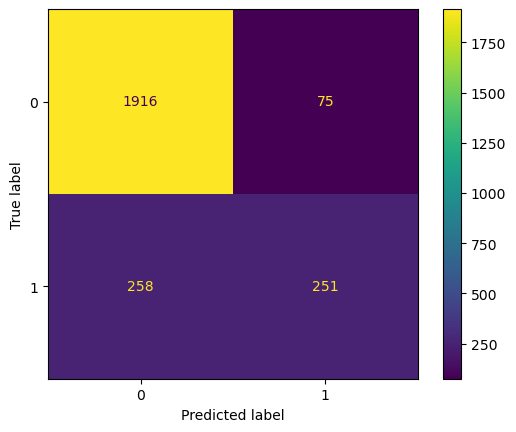

In [35]:
predictions = final_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels= final_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= final_clf.classes_)
disp.plot()
plt.show()

In [ ]:
### Where to go from here?
        ### The model predicts correctly 86% of the time.  WE CAN MAKE THAT BETTER!!!!
        ### I did take out gender out of the features, but this could make a huge change in relation to the model
        